# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zefanya Danovanta Tarigan
- **Email:** @zefanyadanovantaa@gmail.com
- **ID Dicoding:** B244003E

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda pada hari libur dan hari kerja di tiap tahunnya?
- Pada jam berapa rata rata penyewaan sepeda paling tinggi ?
- Bagaimaa pesebaran penyewaan pada tiap musimnya ?

## Import Semua Packages/Library yang Digunakan

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("dashboard/data/day.csv")
day_df.head()

In [ ]:
hour_df = pd.read_csv("dashboard/data/hour.csv")
hour_df.head()

**Insight:**
- Mengambil data day.csv ke variabel "day_df"
- Mengambil data hour.csv ke variabel "hour_df"

### Assessing Data

#### Menilai tabel `day_df`

In [ ]:
day_df.info()
day_df.isna().sum()
day_df.duplicated().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

#### Menilai tabel `hour_df`

In [ ]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

**Insight:**
- Mengidentifikasi kesalahan data pada tabel hour_df
- Mengidentifikasi kesalahan data pada tabel day_df

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

**Insight:**
- Mengubah tipe data di tabel day_df pada variabel dteday menjadi tipe data datetime
- Mengubah tipe data di tabel hour_df pada variabel dteday menjadi tipe data datetime


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
day_df.sample(5)

In [ ]:
day_df.describe(include="all")

In [232]:
day_df['Day_type'] = day_df['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
day_df['year'] = day_df['dteday'].dt.year
day_type_year_summary = day_df.groupby(['year', 'Day_type'])['cnt'].mean().reset_index()

In [ ]:
day_df.groupby(by="season").agg({
    "cnt":["sum","min","max","mean","std"]
})

In [ ]:
day_df.groupby('season')['cnt'].sum().reset_index()
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season_label'] = day_df['season'].map(season_labels)
day_df.sample(5)

In [ ]:
day_df.groupby(by=["year","workingday"]).agg({
    "cnt":["sum","min","max","mean","std"]
})

In [ ]:
day_df.groupby(by=["weathersit"]).agg({
    "cnt":["sum","min","max","mean"]
})

In [ ]:
day_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_labels = {
    1: 'Baik',
    2: 'Sedang',
    3: 'Sedikit Buruk',
    4: 'Buruk'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)
day_df.sample(5)

In [238]:
    day_df['Day_type'] = day_df['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
    day_df['year'] = day_df['dteday'].dt.year
    day_type_year_summary = day_df.groupby(['year','Day_type'])['cnt'].mean().reset_index()

### Explore `hour_df`

In [ ]:
hour_df.sample(5)

In [ ]:
hour_df.describe(include="all")

In [241]:
hourly_counts = hour_df.groupby('hr')['cnt'].mean()

In [ ]:
hour_df.groupby(by=["hr"]).agg({
    "cnt":["sum","min", "max","mean","std"]
})

In [268]:
hour_df['Day_type'] = hour_df['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
hour_df['year'] = hour_df['dteday'].dt.year
day_type_year_summary = hour_df.groupby(['year', 'Day_type'])['cnt'].mean().reset_index()

In [ ]:
hour_df.groupby('season')['cnt'].sum().reset_index()
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_df['season_label'] = hour_df['season'].map(season_labels)
hour_df.sample(5)

In [ ]:
hour_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_labels = {
    1: 'Baik',
    2: 'Sedang',
    3: 'Sedikit Buruk',
    4: 'Buruk'
}
hour_df['weather_label'] = hour_df['weathersit'].map(weather_labels)
hour_df.sample(5)

**Insight:**
- Melakukan eksplorasi terhadap tabel day_df untuk menjawab pertanyaan yang di analisis
- Melakukan eksplorasi terhadap tabel hour_df untuk menjawab pertanyaan yang di analisis
- Melakukan eksplorasi terhadap tabel all_df untuk menjawab pertanyaan yang di analisis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=day_type_year_summary,
    x="Day_type",
    y="cnt",
    hue="year",
    palette="viridis"
   )

plt.title("Penyewaan Sepeda Berdasarkan Tipe Hari dan Tahun", fontsize=14)
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Tahun")
plt.show()

### Pertanyaan 2:

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker = "o")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam",fontsize = 14)
plt.xlabel("Hour (0-23)", fontsize= 12)
plt.ylabel("Rata-rata Penyewaan", fontsize = 12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True)
plt.show()

### Pertanyaan 3:

In [ ]:
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(
    season_summary['cnt'],
    labels=season_summary['season_label'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
    explode =explode
    )
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.axis('equal')
plt.show()

**Insight:**
- Membuat visualisasi berbentuk beberapa diagram dari pertanyaan yang di analisis
- Mmeberikan keterangan pada diagram tersebut agar dapat dimengerti oleh client terhadap analisis

## Analisis Lanjutan

### Analisis RFM

In [304]:
all_df = pd.concat([hour_df, day_df], ignore_index=True)
all_df.to_csv("dashboard/all.csv", index=False)

In [305]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        18110 non-null  int64         
 1   dteday         18110 non-null  datetime64[ns]
 2   season         18110 non-null  int64         
 3   yr             18110 non-null  int64         
 4   mnth           18110 non-null  int64         
 5   hr             17379 non-null  float64       
 6   holiday        18110 non-null  int64         
 7   weekday        18110 non-null  int64         
 8   workingday     18110 non-null  int64         
 9   weathersit     18110 non-null  int64         
 10  temp           18110 non-null  float64       
 11  atemp          18110 non-null  float64       
 12  hum            18110 non-null  float64       
 13  windspeed      18110 non-null  float64       
 14  casual         18110 non-null  int64         
 15  registered     1811

In [306]:
all_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Day_type,year,season_label,weather_label
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,17379.000000,18110.000000,18110.000000,18110.000000,18110.000000,...,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110,18110.000000,18110,18110
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hari Kerja,NaN,Fall,Baik
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12365,NaN,4684,11876
mean,8354.006405,2012-01-02 03:00:25.046935296,2.501436,0.502485,6.537051,11.546752,0.028769,3.003424,0.682772,1.424075,...,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,NaN,2011.502485,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2011.000000,NaN,NaN
25%,3797.250000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,NaN,2011.000000,NaN,NaN
50%,8324.500000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,NaN,2012.000000,NaN,NaN
75%,12851.750000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,NaN,2012.000000,NaN,NaN
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,NaN,2012.000000,NaN,NaN


In [307]:
all_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Day_type,year,season_label,weather_label
4537,4538,2011-07-12,3,0,7,23.0,0,2,1,1,...,0.712100,0.520000,0.000000,20,59,79,Hari Kerja,2011,Fall,Baik
18101,723,2012-12-23,1,1,12,NaN,0,0,0,1,...,0.259471,0.515417,0.133083,408,1379,1787,Hari Libur,2012,Spring,Baik
10781,10782,2012-03-30,2,1,3,8.0,0,5,1,1,...,0.318200,0.660000,0.164200,38,555,593,Hari Kerja,2012,Summer,Baik
11125,11126,2012-04-13,2,1,4,18.0,0,5,1,1,...,0.515200,0.260000,0.134300,107,564,671,Hari Kerja,2012,Summer,Baik
4147,4148,2011-06-26,3,0,6,17.0,0,0,0,2,...,0.651500,0.420000,0.164200,178,243,421,Hari Libur,2011,Fall,Sedang


In [308]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

In [311]:
all_df.groupby('registered').agg(
    recency=('dteday', 'max'),
    frequency=('dteday', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

,registered,recency,frequency,monetary
0,0,2012-11-23,24,35
1,1,2012-12-31,201,294
2,2,2012-12-30,245,648
3,3,2012-12-31,294,1154
4,4,2012-12-28,307,1602
...,...,...,...,...
1435,6844,2012-10-03,1,7572
1436,6898,2012-10-24,1,7693
1437,6911,2012-10-10,1,7691
1438,6917,2012-09-21,1,8167


In [314]:
all_df['recency'] = (all_df['recency'].max() - all_df['recency']).dt.days

KeyError: 'recency'

### Visualisasi Hasil RFM

In [ ]:
#Recency
sns.histplot(user_rfm["recency"], kde = True)
plt.title("Distribusi Recency Pengguna")
plt.show()

In [ ]:
#Frequency
sns.histplot(user_rfm["frequency"], kde = True)
plt.title("Distribusi Frequency Pengguna")
plt.show()

In [ ]:
#Monetary
sns.histplot(user_rfm["monetary"], kde = True)
plt.title("Distribusi Monetary Pengguna")
plt.show()

### Geospatial Analysis

/var/folders/k2/q1y222d93tbd9z97csl3rg0r0000gn/T/ipykernel_38212/1284528506.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weather_labels.values())


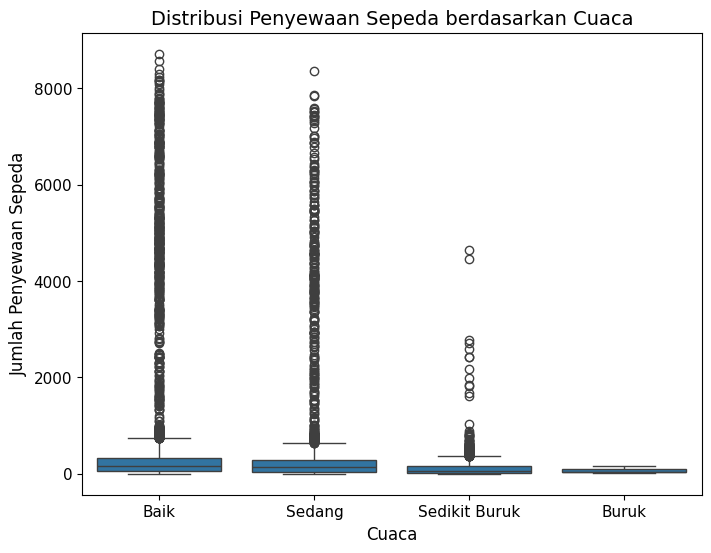

In [289]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=all_df, x='weathersit', y='cnt')

ax.set_xticklabels(weather_labels.values())
plt.title('Distribusi Penyewaan Sepeda berdasarkan Cuaca', fontsize = 14)
plt.xlabel('Cuaca', fontsize = 12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize =12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Clustering Analysis

In [254]:
hourly_data = all_df.groupby('hr').agg(
    total_rentals=('cnt', 'sum')
).reset_index()

# Membuat linkage
Z = linkage(hourly_data[['hr', 'total_rentals']], 'ward')

### Visualisasi Clustering Analysis

In [ ]:
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Dendrogram Clustering Penyewaan Sepeda per Jam', fontsize = 14)
plt.xlabel('Jam', fontsize =12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize =12)
plt.xticks(rotation = 0)
plt.yticks()
plt.show()

## Conclusion

#### Konlusi pertanyaan 1 :
- Rata rata penyewaan sepeda pada tahun 2011, cenderung lebih sedikit di banding 2012, hal ini bisa disebabkan karna faktor cuaca. Peningkatan jumlah penyewaan pada hari kerja karena orang lebih cenderung menggunakan sepeda untuk berangkat kerja atau kegiatan rutin. Sementara itu, pada hari libur, jumlah penyewaan bisa jadi lebih rendah karena orang cenderung memilih aktivitas lain atau beristirahat.

#### Konlusi pertanyaan 2 :
- Penyewaan sepeda cenderung lebih tinggi pada jam 8 pagi yaitu sebanyak 359.01 dan 7 sore hari sebanyak 461.45, yang biasanya terkait jam-jam sibuk ketika orang berangkat dan pulang kerja. Sementara pada jam tengah hari, jumlah penyewaan biasanya menurun karena banyak orang sudah bekerja.

### Konlusi pertanyaan 3 :
- Tingginya penyewaan terletak pada musim gugur (fall) yaitu sebesar 32.2 % dan pada musim panas (Summer) sebesar 27.9%. hal ini dipengaruhi oleh cuaca yang nyaman dan aktivitas rutin, sedangkan penyewaan pada musim dingin (Winter) sebesar 25.6% dan pada musim semi (Spring) sebesar 14.3 % tetap signifikan karena pengguna rutin.